In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
response_file = "data/formresponses.csv"
df = pd.read_csv(response_file)
df

,Timestamp,A,B,C,D,E,First Name,Last Name,GTID
0,1/7/2016 18:25:10,10,9,8,7,6,1,0,1
1,1/7/2016 18:25:11,9,8,7,6,5,2,0,2
2,1/7/2016 18:25:12,8,7,6,5,4,3,0,3
3,1/7/2016 18:25:13,7,6,5,4,3,4,0,4
4,1/7/2016 18:25:14,6,5,4,3,2,5,1,5


In [3]:
G = nx.Graph()
G.add_nodes_from(df['GTID'], bipartite=1)

papers = list(df.keys())
keys = ['Timestamp','First Name','Last Name','GTID']
papers = [x for x in papers if x not in keys]
G.add_nodes_from(papers, bipartite=0)

In [4]:
for index, row in df.iterrows():
    for paper in papers:
        G.add_weighted_edges_from([(row['GTID'],paper,row[paper])])

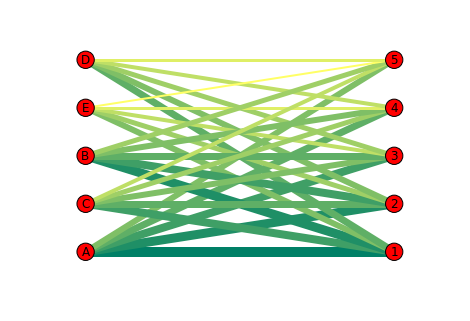

In [5]:
X, Y = nx.bipartite.sets(G)
pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(X) ) # put nodes from X at x=1
pos.update( (n, (2, i)) for i, n in enumerate(Y) ) # put nodes from Y at x=2

edge_width = []
edge_colors = []
edge_cmap = plt.cm.summer_r

for (u,v,d) in G.edges(data=True):
    edge_width.append(d['weight'])
    edge_colors.append(d['weight'])

nx.draw(G, pos=pos, width = edge_width, edge_color=edge_colors, with_labels=True, edge_cmap=edge_cmap)
plt.show()

In [13]:
assignments = nx.max_weight_matching(G, maxcardinality=False)
assigned = []
for index, row in df.iterrows():
    assigned.append(assignments[row['GTID']])
df['Assigned'] = pd.Series(assigned, index=df.index)

In [14]:
df

,Timestamp,A,B,C,D,E,First Name,Last Name,GTID,Assigned
0,1/7/2016 18:25:10,10,9,8,7,6,1,0,1,A
1,1/7/2016 18:25:11,9,8,7,6,5,2,0,2,B
2,1/7/2016 18:25:12,8,7,6,5,4,3,0,3,C
3,1/7/2016 18:25:13,7,6,5,4,3,4,0,4,D
4,1/7/2016 18:25:14,6,5,4,3,2,5,1,5,E
